In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt
import warnings

### Load and consolidate 10 years of HDB resale data (from 2012 to 2021)

In [2]:
df_resale_2012_2014 = pd.read_csv("resale-flat-prices Mar 2012 to Dec 2014.csv")
df_resale_2015_2016 = pd.read_csv("resale-flat-prices Jan 2015 to Dec 2016.csv")
df_resale_2017_2021 = pd.read_csv("resale-flat-prices Jan 2017 to Aug 2021.csv")

In [3]:
df_resale_2012_2014.head() #Note that this dataset does not have the remaining_lease column

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [4]:
df_resale_2015_2016.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [5]:
df_resale_2017_2021.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [6]:
# Combine 3 dataframes
df_resale = pd.concat([df_resale_2012_2014,df_resale_2015_2016,df_resale_2017_2021], ignore_index=True)

##### Notice that there are null values in "remaining-lease" as this information is only available from Jan 2015 onwards.

In [7]:
df_resale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195054 entries, 0 to 195053
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                195054 non-null  object 
 1   town                 195054 non-null  object 
 2   flat_type            195054 non-null  object 
 3   block                195054 non-null  object 
 4   street_name          195054 non-null  object 
 5   storey_range         195054 non-null  object 
 6   floor_area_sqm       195054 non-null  float64
 7   flat_model           195054 non-null  object 
 8   lease_commence_date  195054 non-null  int64  
 9   resale_price         195054 non-null  float64
 10  remaining_lease      142851 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 16.4+ MB


### Data cleaning

##### Convert month column to datetime format

In [8]:
df_resale['month'] = pd.to_datetime(df_resale['month'], format='%Y %m')

In [9]:
df_resale["flat_type"].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION', '1 ROOM'], dtype=object)

In [10]:
df_resale['flat_model'].value_counts()

Model A                   60206
Improved                  49724
New Generation            29792
Premium Apartment         19969
Simplified                 9170
Apartment                  7842
Standard                   6325
Maisonette                 5662
Model A2                   2642
DBSS                       2242
Adjoined flat               336
Model A-Maisonette          334
Type S1                     322
Type S2                     158
Terrace                     126
Multi Generation             78
Premium Apartment Loft       72
Improved-Maisonette          27
Premium Maisonette           17
2-room                       10
Name: flat_model, dtype: int64

In [11]:
df_resale['storey_range'].unique()

array(['06 TO 10', '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25',
       '26 TO 30', '36 TO 40', '31 TO 35', '04 TO 06', '01 TO 03',
       '07 TO 09', '10 TO 12', '13 TO 15', '19 TO 21', '22 TO 24',
       '16 TO 18', '25 TO 27', '28 TO 30', '37 TO 39', '34 TO 36',
       '31 TO 33', '40 TO 42', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [12]:
df_resale['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

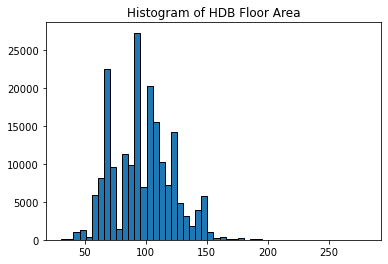

Terrace               10
Maisonette             3
Premium Maisonette     2
Name: flat_model, dtype: int64

In [49]:
plt.hist(df_resale['floor_area_sqm'], bins=50, edgecolor='black')
plt.title('Histogram of HDB Floor Area')
plt.show()
#To show flat models and their respective counts for >200sqm HDB units
df_resale[df_resale['floor_area_sqm'] > 200]['flat_model'].value_counts() 

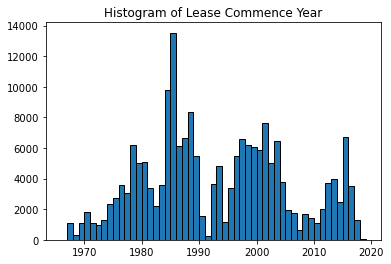

In [14]:
bins = df_resale['lease_commence_date'].max() - df_resale['lease_commence_date'].min()
plt.hist(df_resale['lease_commence_date'], bins=bins, edgecolor='black')
plt.title('Histogram of Lease Commence Year')
plt.show()

In [15]:
df_resale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195054 entries, 0 to 195053
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                195054 non-null  datetime64[ns]
 1   town                 195054 non-null  object        
 2   flat_type            195054 non-null  object        
 3   block                195054 non-null  object        
 4   street_name          195054 non-null  object        
 5   storey_range         195054 non-null  object        
 6   floor_area_sqm       195054 non-null  float64       
 7   flat_model           195054 non-null  object        
 8   lease_commence_date  195054 non-null  int64         
 9   resale_price         195054 non-null  float64       
 10  remaining_lease      142851 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 16.4+ MB


In [16]:
def years_left(text):
    if isinstance(text, str):
        yearmonth = [int(s) for s in text.split() if s.isdigit()]
        if len(yearmonth) > 1: # if there's year and month
            years = yearmonth[0] + (yearmonth[1]/12)
        else: # if only year
            years = yearmonth[0]
        return years

df_resale['remaining_lease'] = df_resale['remaining_lease'].apply(lambda x: years_left(x))

In [52]:
#Create separate column showing year of sale only
df_resale['year'] = pd.DatetimeIndex(df_resale['month']).year

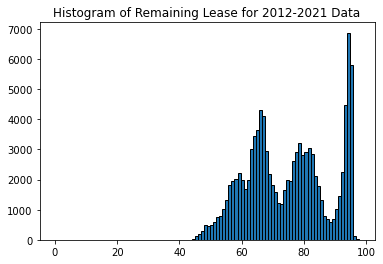

In [38]:
plt.hist(df_resale['remaining_lease'], bins=100, edgecolor='black')
plt.title('Histogram of Remaining Lease for 2012-2021 Data')
plt.show()
warnings.filterwarnings("ignore")

### Adjust for inflation using CPI data from Singstat

In [18]:
cpi = pd.read_csv("Monthly CPI housing and utilities.csv")
#Convert date column to datetime format
cpi['month'] = pd.to_datetime(cpi['month'], format='%Y %b')

In [19]:
#left join df_resale with cpi
df_resale = df_resale.merge(cpi, on='month', how='left') 

In [20]:
# Formula for adjusting resale prices: (Resale_price / CPI) * 100
df_resale['real_price'] = (df_resale['resale_price'] / df_resale['cpi']) * 100 

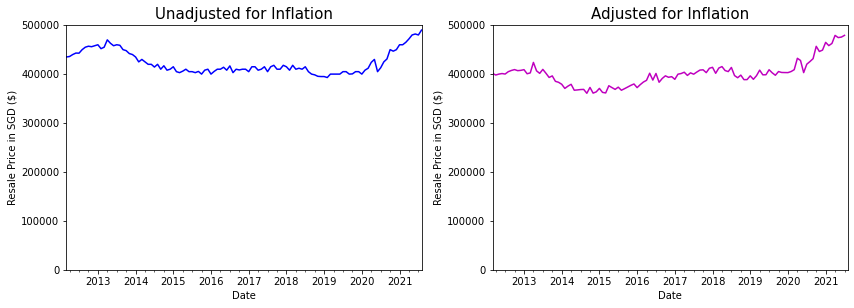

In [21]:
fig = plt.figure(figsize=(14,4.5))
ax1 = fig.add_subplot(121)
df_resale.groupby('month')[['resale_price']].median().plot(ax=ax1, color='b', legend=None)
ax1.set_xlabel('Date'), ax1.set_ylabel('Resale Price in SGD ($)'), ax1.set_ylim(0, 500000), ax1.set_title('Unadjusted for Inflation', size=15)

#Adjusted for inflation
ax2 = fig.add_subplot(122)
df_resale.groupby('month')[['real_price']].median().plot(ax=ax2, color='m', legend=None)
ax2.set_xlabel('Date'), ax2.set_ylabel('Resale Price in SGD ($)'), ax2.set_ylim(0, 500000), ax2.set_title('Adjusted for Inflation',size=15)

plt.show()

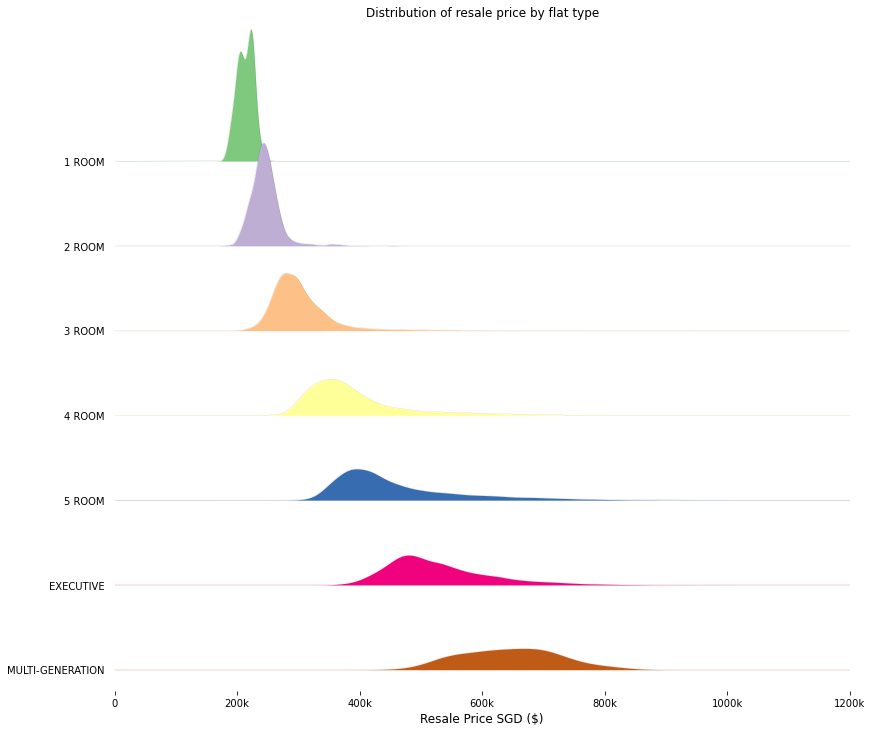

In [29]:
import joypy
fig, axes = joypy.joyplot(df_resale, by="flat_type", column="real_price",figsize=(12,10),
             linewidth=0.05,overlap=1.5,colormap=plt.cm.get_cmap('Accent'))
axes[-1].set_xlim([0,1200000])
axes[-1].set_xticklabels(['0','200k', '400k', '600k', '800k', '1000k', '1200k', '1400k'])
plt.title("Distribution of resale price by flat type")
plt.xlabel('Resale Price SGD ($)', fontsize=12)
fig.show()

From the figure above, it can be observed that 1-room flats have the narrowest range in resale prices, while larger flats and multi-generation flats have a very wide price range, which is expected. 

### Price distribution by town (violin plot)

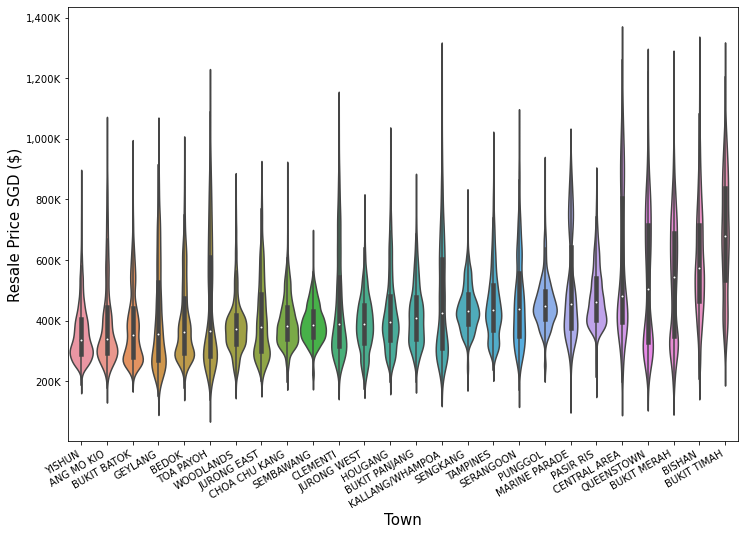

In [37]:
fig = plt.figure(figsize=(12,8))
p=sns.violinplot(x='town', y='real_price', data=df_resale, width=1,
                order=df_resale.groupby('town')['real_price'].median().sort_values().reset_index()['town'].tolist())
p.set_xticklabels(p.get_xticklabels(), rotation=30, ha='right'), p.set_xlabel('Town', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
plt.show()

### Price distribution by flat model (box and whiskers plot)

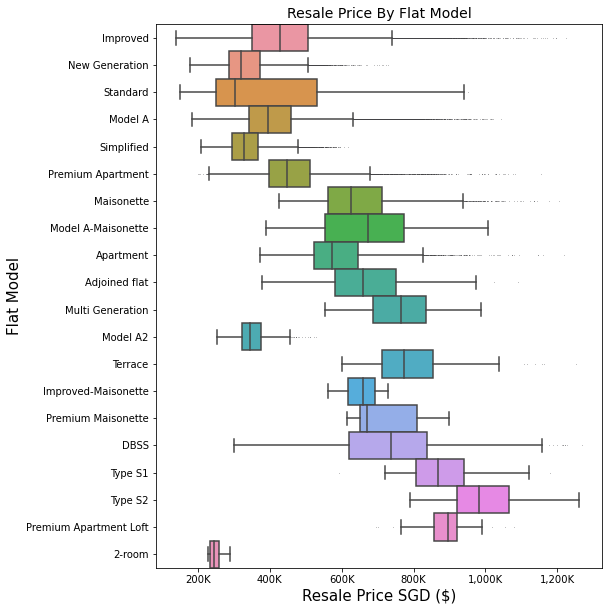

In [48]:
fig = plt.figure(figsize=(8,10))
p=sns.boxplot(y='flat_model', x='real_price', data=df_resale, width=1, orient='h', flierprops = dict(markerfacecolor = 'blue', markersize = 0.1, linestyle='none'))
p.set_xlabel('Resale Price SGD ($)', size=15)
p.set_ylabel('Flat Model', size=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_xticks()/1000]
p.set_xticklabels(xlabels)
p.set_title('Resale Price By Flat Model', size=14)
plt.show()

### Scatterplot of resale price vs floor area

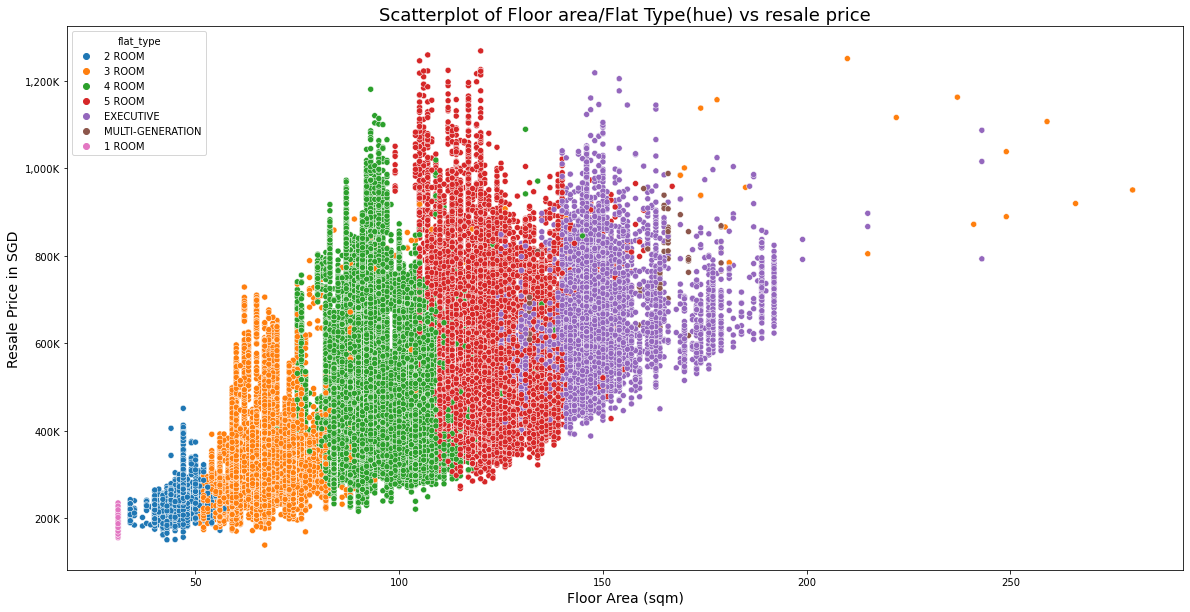

In [67]:
plt.figure(figsize=(20,10))
p=sns.scatterplot(x='floor_area_sqm', y='real_price', data=df_resale, hue = 'flat_type')
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price in SGD',size=14)
p.set_xlabel('Floor Area (sqm)',size=14)
plt.title("Scatterplot of Floor area/Flat Type(hue) vs resale price", size = 18)
plt.show()